In [3]:
import json
import pandas as pd
from pathlib import Path

# ✅ Use correct path based on your file location
file_path = Path("user-wallet-transactions.json")

# ✅ Load JSON into Python list
with open(file_path, "r") as f:
    raw_data = json.load(f)  # This is a list of dictionaries

# ✅ Convert to pandas DataFrame
df = pd.DataFrame(raw_data)

# ✅ Now inspect basic info
print(" Loaded JSON with shape:", df.shape)
print("\n Column names:", df.columns.tolist())
print("\n Sample rows:")
print(df.head())

print("\n Column types and info:")
print(df.info())


 Loaded JSON with shape: (100000, 13)

 Column names: ['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt', 'updatedAt']

 Sample rows:
                                    _id  \
0  {'$oid': '681d38fed63812d4655f571a'}   
1  {'$oid': '681aa70dd6df53021cc6f3c0'}   
2  {'$oid': '681d04c2d63812d4654c733e'}   
3  {'$oid': '681d133bd63812d46551b6ef'}   
4  {'$oid': '681899e4ba49fc91cf2f4454'}   

                                   userWallet  network protocol  \
0  0x00000000001accfa9cef68cf5371a23025b6d4b6  polygon  aave_v2   
1  0x000000000051d07a4fb3bd10121a343d85818da6  polygon  aave_v2   
2  0x000000000096026fb41fc39f9875d164bd82e2dc  polygon  aave_v2   
3  0x000000000096026fb41fc39f9875d164bd82e2dc  polygon  aave_v2   
4  0x0000000000e189dd664b9ab08a33c4839953852c  polygon  aave_v2   

                                              txHash  \
0  0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...   
1  0xe6f

In [4]:
import json
import pandas as pd

# Load JSON
with open("user-wallet-transactions.json", "r") as f:
    raw_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(raw_data)

# Expand the nested 'actionData' dictionary
df_action = pd.json_normalize(df['actionData'])
df_flat = pd.concat([df.drop(columns=['actionData']), df_action], axis=1)

# Preview
print(f" Data shape: {df_flat.shape}")
print(df_flat.columns)
print(df_flat.head(2))


 Data shape: (100000, 35)
Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', '__v', 'createdAt', 'updatedAt',
       'type', 'amount', 'assetSymbol', 'assetPriceUSD', 'poolId', 'userId',
       'toId', 'borrowRateMode', 'borrowRate', 'variableTokenDebt',
       'stableTokenDebt', 'callerId', 'useATokens', 'repayerId',
       'liquidatorId', 'collateralAmount', 'collateralAssetPriceUSD',
       'principalAmount', 'borrowAssetPriceUSD', 'collateralReserveId',
       'collateralReserveSymbol', 'principalReserveId',
       'principalReserveSymbol'],
      dtype='object')
                                    _id  \
0  {'$oid': '681d38fed63812d4655f571a'}   
1  {'$oid': '681aa70dd6df53021cc6f3c0'}   

                                   userWallet  network protocol  \
0  0x00000000001accfa9cef68cf5371a23025b6d4b6  polygon  aave_v2   
1  0x000000000051d07a4fb3bd10121a343d85818da6  polygon  aave_v2   

                              

In [5]:
print(" Unique tokens: ")
print(df_flat['assetSymbol'].unique())
print("\n Token usage counts: ")
print(df_flat['assetSymbol'].value_counts())


 Unique tokens: 
['USDC' 'WMATIC' 'DAI' 'WBTC' 'WETH' 'USDT' 'WPOL' 'AAVE' '']

 Token usage counts: 
assetSymbol
USDC      29673
DAI       17689
USDT      16019
WETH      11619
WPOL       9254
WMATIC     9051
WBTC       4178
AAVE       2269
            248
Name: count, dtype: int64


In [6]:
print(df_flat[['amount', 'assetPriceUSD', 'assetSymbol']].isnull().sum())

amount           0
assetPriceUSD    0
assetSymbol      0
dtype: int64


In [7]:
# Remove bad / incomplete entries
df_flat = df_flat[df_flat['assetSymbol'].str.strip() != ""]
print(df_flat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99752 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      99752 non-null  object 
 1   userWallet               99752 non-null  object 
 2   network                  99752 non-null  object 
 3   protocol                 99752 non-null  object 
 4   txHash                   99752 non-null  object 
 5   logId                    99752 non-null  object 
 6   timestamp                99752 non-null  int64  
 7   blockNumber              99752 non-null  int64  
 8   action                   99752 non-null  object 
 9   __v                      99752 non-null  int64  
 10  createdAt                99752 non-null  object 
 11  updatedAt                99752 non-null  object 
 12  type                     99752 non-null  object 
 13  amount                   99752 non-null  object 
 14  assetSymbol              99

In [8]:
columns_to_drop = [
    'borrowRateMode', 'liquidatorId', 'collateralAmount',
    'collateralAssetPriceUSD', 'principalAmount', 'borrowAssetPriceUSD',
    'collateralReserveId', 'collateralReserveSymbol',
    'principalReserveId', 'principalReserveSymbol'
]

df_flat.drop(columns=columns_to_drop, inplace=True)
print(df_flat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99752 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                99752 non-null  object
 1   userWallet         99752 non-null  object
 2   network            99752 non-null  object
 3   protocol           99752 non-null  object
 4   txHash             99752 non-null  object
 5   logId              99752 non-null  object
 6   timestamp          99752 non-null  int64 
 7   blockNumber        99752 non-null  int64 
 8   action             99752 non-null  object
 9   __v                99752 non-null  int64 
 10  createdAt          99752 non-null  object
 11  updatedAt          99752 non-null  object
 12  type               99752 non-null  object
 13  amount             99752 non-null  object
 14  assetSymbol        99752 non-null  object
 15  assetPriceUSD      99752 non-null  object
 16  poolId             99752 non-null  object
 17

In [9]:
token_decimals = {
    'USDC': 6,
    'USDT': 6,
    'DAI': 18,
    'WMATIC': 18,
    'WETH': 18,
    'WBTC': 8,
    'AAVE': 18,
    'WPOL': 18,
}
def convert_amount(row):
    symbol = row['assetSymbol']
    raw = float(row['amount'])
    decimals = token_decimals.get(symbol, 18)
    return raw / (10 ** decimals)

df_flat['adjusted_amount'] = df_flat.apply(convert_amount, axis=1)
df_flat['usd_value'] = df_flat['adjusted_amount'] * df_flat['assetPriceUSD'].astype(float)


In [10]:
import pandas as pd
import numpy as np


# Step 1: Convert timestamp to readable datetime
df_flat['datetime'] = pd.to_datetime(df_flat['timestamp'], unit='s')

# Step 2: Filter borrow and repay transactions
df_borrow = df_flat[df_flat['action'] == 'borrow'][['userWallet', 'datetime', 'usd_value']]
df_repay = df_flat[df_flat['action'] == 'repay'][['userWallet', 'datetime', 'usd_value']]

# Step 3: Group wallets by first borrow and repay dates
borrow_first = df_borrow.groupby('userWallet')['datetime'].min().rename("first_borrow_time")
repay_first = df_repay.groupby('userWallet')['datetime'].min().rename("first_repay_time")

# Step 4: Merge into single DataFrame
repay_delay_df = pd.merge(borrow_first, repay_first, left_index=True, right_index=True, how='left')

# Step 5: Calculate repay delay in days
repay_delay_df['repay_delay_days'] = (
    (repay_delay_df['first_repay_time'] - repay_delay_df['first_borrow_time']).dt.days
)

# Step 6: Replace NaN (never repaid) with -1
repay_delay_df['repay_delay_days'] = repay_delay_df['repay_delay_days'].fillna(-1)

# Step 7: Calculate total borrowed and repaid value (USD)
borrow_sums = df_borrow.groupby('userWallet')['usd_value'].sum().rename("total_borrow_usd")
repay_sums = df_repay.groupby('userWallet')['usd_value'].sum().rename("total_repay_usd")

# Step 8: Merge into final user-level features
wallet_behavior = pd.concat([repay_delay_df, borrow_sums, repay_sums], axis=1).fillna({
    'total_borrow_usd': 0,
    'total_repay_usd': 0
})

# Step 9: Compute repay ratio
wallet_behavior['repay_ratio'] = wallet_behavior['total_repay_usd'] / wallet_behavior['total_borrow_usd']
wallet_behavior['repay_ratio'] = wallet_behavior['repay_ratio'].replace(np.inf, 0).fillna(0)

# Step 10: Classify wallet behavior with interpretation
def tag_wallet(row):
    if row.total_borrow_usd == 0:
        return "No Borrowing"
    if row.total_repay_usd == 0:
        return " No Repayment"
    elif row.repay_ratio < 0.5:
        return " Partial Repayment"
    elif row.repay_ratio >= 0.95 and row.repay_delay_days <= 7:
        return " Prompt Repayment"
    elif row.repay_ratio >= 0.95:
        return " Late but Full Repayment"
    else:
        return " Partial but Timely Repayment"

wallet_behavior['repayment_behavior'] = wallet_behavior.apply(tag_wallet, axis=1)

# Show summary
print(wallet_behavior[['total_borrow_usd', 'total_repay_usd', 'repay_ratio', 'repay_delay_days', 'repayment_behavior']].head(10))


                                            total_borrow_usd  total_repay_usd  \
userWallet                                                                      
0x0000000002032370b971dabd36d72f3e5a7bf1ee      1.303558e+05     7.015026e+04   
0x000000000a38444e0a6e37d3b630d7e855a7cb13      1.163143e+04     1.164028e+04   
0x000000003ce0cf2c037493b1dc087204bd7f713e      1.348384e+05     2.758686e+03   
0x0000000506063a51c6ce59906d8c40f7d7fe92a7      5.975020e+05     5.975687e+05   
0x00000029ff545c86524ade7caf132527707948c4      3.381166e+06     3.351014e+06   
0x00000087c4cebffb95746d1935de7fbcab092f40      1.265149e+06     1.236774e+06   
0x000000e28faa823d5b53ff6c2922c28335840375      2.977863e+06     2.270685e+06   
0x000006eee6e39015cb523aebdd4d0b1855aba682      2.475897e+04     2.315127e+04   
0x00002b503a75998c97508916a74fdb41934fa030      2.401892e+06     1.924330e+06   
0x0000ce08fa224696a819877070bf378e8b131acf      1.257933e+03     0.000000e+00   

                           

In [11]:
action_counts = df_flat.groupby('userWallet')['action'].value_counts().unstack(fill_value=0)
action_counts['action_types_used'] = (action_counts > 0).sum(axis=1)  # diversity score

print("📊 Sample action mix for wallets:")
print(action_counts.head(10))


📊 Sample action mix for wallets:
action                                      borrow  deposit  redeemunderlying  \
userWallet                                                                      
0x00000000001accfa9cef68cf5371a23025b6d4b6       0        1                 0   
0x000000000051d07a4fb3bd10121a343d85818da6       0        1                 0   
0x000000000096026fb41fc39f9875d164bd82e2dc       0        2                 0   
0x0000000000e189dd664b9ab08a33c4839953852c       0        0                17   
0x0000000002032370b971dabd36d72f3e5a7bf1ee      15      250               130   
0x000000000a38444e0a6e37d3b630d7e855a7cb13       8        7                 5   
0x000000003853fcedcd0355fec98ca3192833f00b       0        8                 0   
0x000000003ce0cf2c037493b1dc087204bd7f713e      30      309               137   
0x000000007858e6f2668e1e06111cfa24403a5466       0        1                 0   
0x00000001a0f57e850c9db68b4a9bc34677437c5c       0        1                 

In [12]:
# Total transactions per wallet
tx_counts = df_flat['userWallet'].value_counts()
high_tx_wallets = tx_counts[tx_counts > 100]

print("🤖 Wallets with more than 100 transactions (possible bots):")
print(high_tx_wallets.head())


🤖 Wallets with more than 100 transactions (possible bots):
userWallet
0x05c9db563db8e38cc2899297da41ce430b61a484    14265
0x0298b2ecdef68bc139b098461217a5b3161b69c8     1227
0x04d9f6ecd792e48a09fa5dc2138baed8e628a7e5     1089
0x047a96ef72d7ee6a3f193bdb92e998fb300265df      820
0x005f16f017aa933bb41965b52848ceb8ee48b171      767
Name: count, dtype: int64


In [13]:
borrow_tokens = df_flat[df_flat['action'] == 'borrow'].groupby('userWallet')['assetSymbol'].apply(set)
repay_tokens = df_flat[df_flat['action'] == 'repay'].groupby('userWallet')['assetSymbol'].apply(set)

borrow_repay_diff = {}

for user in borrow_tokens.index.intersection(repay_tokens.index):
    if borrow_tokens[user] != repay_tokens[user]:
        borrow_repay_diff[user] = {
            "borrowed": borrow_tokens[user],
            "repaid": repay_tokens[user]
        }

print("🚨 Mismatch in borrow/repay assets:")
for user, assets in list(borrow_repay_diff.items())[:5]:
    print(f"{user} → Borrowed: {assets['borrowed']} | Repaid: {assets['repaid']}")


🚨 Mismatch in borrow/repay assets:
0x0000000002032370b971dabd36d72f3e5a7bf1ee → Borrowed: {'WPOL', 'WMATIC', 'USDT'} | Repaid: {'USDT'}
0x000000003ce0cf2c037493b1dc087204bd7f713e → Borrowed: {'DAI', 'WMATIC', 'WPOL', 'USDT', 'USDC', 'WBTC'} | Repaid: {'DAI', 'USDT', 'WBTC', 'USDC'}
0x00000087c4cebffb95746d1935de7fbcab092f40 → Borrowed: {'DAI', 'WPOL', 'USDT', 'USDC', 'WBTC'} | Repaid: {'DAI', 'USDT', 'USDC', 'WBTC'}
0x000000e28faa823d5b53ff6c2922c28335840375 → Borrowed: {'DAI', 'WMATIC', 'WPOL', 'USDT', 'USDC', 'WETH'} | Repaid: {'DAI', 'WETH', 'USDT', 'USDC'}
0x000006eee6e39015cb523aebdd4d0b1855aba682 → Borrowed: {'DAI', 'USDT'} | Repaid: {'DAI'}


In [14]:
# Filter liquidation transactions
liq = df_flat[df_flat['action'] == 'liquidationcall']
liq_by_wallet = liq['userWallet'].value_counts().head(10)

print("💣 Most frequently liquidated wallets:")
print(liq_by_wallet)


💣 Most frequently liquidated wallets:
Series([], Name: count, dtype: int64)


In [15]:
print(df_flat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99752 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                99752 non-null  object        
 1   userWallet         99752 non-null  object        
 2   network            99752 non-null  object        
 3   protocol           99752 non-null  object        
 4   txHash             99752 non-null  object        
 5   logId              99752 non-null  object        
 6   timestamp          99752 non-null  int64         
 7   blockNumber        99752 non-null  int64         
 8   action             99752 non-null  object        
 9   __v                99752 non-null  int64         
 10  createdAt          99752 non-null  object        
 11  updatedAt          99752 non-null  object        
 12  type               99752 non-null  object        
 13  amount             99752 non-null  object        
 14  assetSymbol

In [16]:
df_flat['action'].value_counts()

action
deposit             37808
redeemunderlying    32305
borrow              17086
repay               12553
Name: count, dtype: int64

In [17]:
# Get all wallets involved in any borrow or repay
all_wallets = df_flat[df_flat['action'].isin(['borrow', 'repay'])]['userWallet'].unique()

# Compute sets of borrowed and repaid asset symbols for every such wallet
borrow_assets = df_flat[df_flat['action'] == 'borrow'].groupby('userWallet')['assetSymbol'].apply(set).reindex(all_wallets, fill_value=set())
repay_assets = df_flat[df_flat['action'] == 'repay'].groupby('userWallet')['assetSymbol'].apply(set).reindex(all_wallets, fill_value=set())

# True if sets do not match, else False
mismatch_flag = (borrow_assets != repay_assets).rename("asset_mismatch").astype(bool)


In [18]:
import numpy as np
import pandas as pd

# Total USD value aggregation per action type
agg_total = df_flat.pivot_table(
    index='userWallet',
    columns='action',
    values='usd_value',
    aggfunc='sum',
    fill_value=0
).rename(columns={
    'deposit': 'total_deposit_usd',
    'borrow': 'total_borrow_usd',
    'repay': 'total_repay_usd',
    'redeemunderlying': 'total_redeem_usd'
})

# Action counts per type and diversity
action_counts = df_flat.groupby('userWallet')['action'].value_counts().unstack(fill_value=0)
action_counts["action_types_used"] = (action_counts > 0).sum(axis=1)

# Repay ratio (responsible repayment)
agg_total['repay_ratio'] = np.where(
    agg_total['total_borrow_usd'] > 0,
    agg_total['total_repay_usd'] / agg_total['total_borrow_usd'],
    0
)

# Transaction count per wallet
tx_counts = df_flat['userWallet'].value_counts().rename("tx_count")

# Repay delay (in days) – handle missing values robustly
borrow_first = df_flat[df_flat['action'] == 'borrow'].groupby('userWallet')['datetime'].min()
repay_first = df_flat[df_flat['action'] == 'repay'].groupby('userWallet')['datetime'].min()
repay_delay_days = (repay_first - borrow_first).dt.days.rename('repay_delay_days').fillna(-1)

# Active period in days
activity_days = df_flat.groupby("userWallet").agg(
    first_tx=("datetime", "min"),
    last_tx=("datetime", "max")
)
activity_days["days_active"] = (activity_days["last_tx"] - activity_days["first_tx"]).dt.days

# Asset diversity
asset_diversity = df_flat.groupby('userWallet')['assetSymbol'].nunique().rename("unique_assets")


In [19]:
# Reindex all Series to the full wallet list to ensure proper alignment
wallet_index = pd.Index(sorted(df_flat['userWallet'].unique()), name='userWallet')
to_align = [
    agg_total, 
    action_counts[['deposit', 'borrow', 'repay', 'redeemunderlying', 'action_types_used']],
    tx_counts, repay_delay_days, activity_days['days_active'],
    asset_diversity, mismatch_flag
]
aligned = [s.reindex(wallet_index, fill_value=0) for s in to_align]

# Concatenate all features along columns
df_wallets = pd.concat(aligned, axis=1).reset_index()
print(df_wallets.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userWallet         3497 non-null   object 
 1   total_borrow_usd   3497 non-null   float64
 2   total_deposit_usd  3497 non-null   float64
 3   total_redeem_usd   3497 non-null   float64
 4   total_repay_usd    3497 non-null   float64
 5   repay_ratio        3497 non-null   float64
 6   deposit            3497 non-null   int64  
 7   borrow             3497 non-null   int64  
 8   repay              3497 non-null   int64  
 9   redeemunderlying   3497 non-null   int64  
 10  action_types_used  3497 non-null   int64  
 11  tx_count           3497 non-null   int64  
 12  repay_delay_days   3497 non-null   float64
 13  days_active        3497 non-null   int64  
 14  unique_assets      3497 non-null   int64  
 15  asset_mismatch     3497 non-null   object 
dtypes: float64(6), int64(8),

In [20]:
all_wallets = df_flat['userWallet'].nunique()
wallets_in_df_wallets = df_wallets['userWallet'].nunique()

print(f"🌐 Total unique wallets in data: {all_wallets}")
print(f"📉 Wallets scored: {wallets_in_df_wallets}")


🌐 Total unique wallets in data: 3497
📉 Wallets scored: 3497


In [21]:
def score_wallet(row):
    score = 1000
    if row['total_borrow_usd'] > 0 and row['total_repay_usd'] == 0:
        score -= 400
    elif row['repay_ratio'] < 0.5:
        score -= 200
    elif row['repay_ratio'] < 0.95:
        score -= 100
    
    if row['repay_ratio'] >= 0.95 and row['repay_delay_days'] >= 0 and row['repay_delay_days'] <= 7:
        score += 100
    elif row['repay_ratio'] >= 0.95:
        score += 50

    if row['repay_delay_days'] > 30:
        score -= 50
    elif row['repay_delay_days'] == -1:
        score -= 100

    if row['action_types_used'] >= 4:
        score += 20
    elif row['action_types_used'] == 1:
        score -= 20

    if row['days_active'] > 60:
        score += 30
    elif row['days_active'] < 7:
        score -= 20

    if row['tx_count'] > 500 and row['deposit'] >= 100:
        score -= 100

    if row['asset_mismatch']:
        score -= 50

    return int(max(0, min(1000, score)))  # clamp between 0 and 1000

df_wallets["credit_score"] = df_wallets.apply(score_wallet, axis=1)



In [22]:
def label_category(score):
    if score >= 900:
        return "Prime (AAA)"
    elif score >= 800:
        return "Strong"
    elif score >= 700:
        return "Moderate"
    elif score >= 600:
        return "Fair"
    elif score >= 400:
        return "Weak"
    elif score >= 200:
        return "High Risk"
    else:
        return "Critical"
        
df_wallets['score_class'] = df_wallets['credit_score'].apply(label_category)


In [23]:
# Distribution of class labels
print(df_wallets['score_class'].value_counts())

# Preview by label
df_wallets.groupby('score_class').agg({
    'credit_score': ['min', 'max', 'count']
}).sort_values(('credit_score', 'min'), ascending=False)


score_class
Moderate       1752
Prime (AAA)     868
Strong          442
Weak            431
Fair              4
Name: count, dtype: int64


credit_score            
                     min   max count
score_class                         
Prime (AAA)          900  1000   868
Strong               800   880   442
Moderate             700   780  1752
Fair                 630   670     4
Weak                 410   480   431

In [24]:
df_wallets[['userWallet', 'credit_score']].sort_values('credit_score', ascending=False).head()

# Save to CSV
df_wallets.to_csv("wallet_credit_scores.csv", index=False)
print("✅ Credit scores saved to wallet_credit_scores.csv")


✅ Credit scores saved to wallet_credit_scores.csv


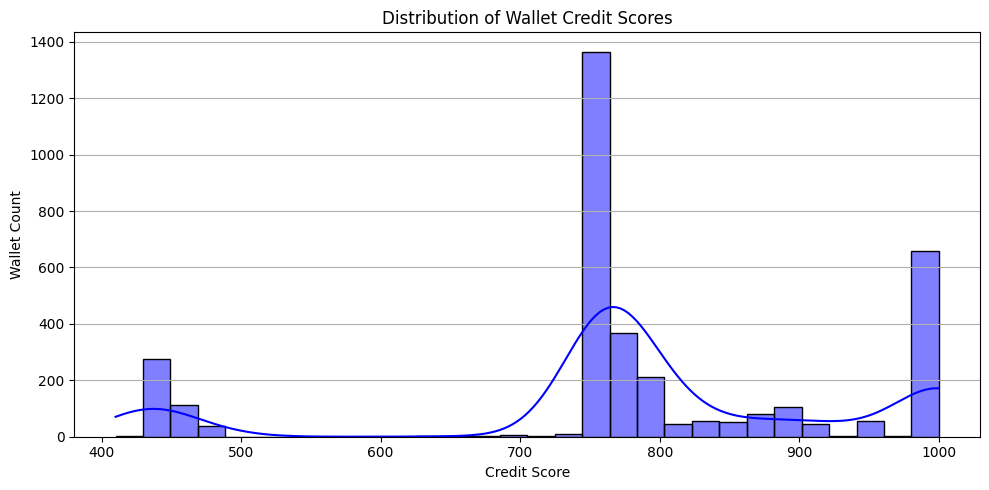

C:\Users\Manya Mangla\AppData\Local\Temp\ipykernel_18792\4249736897.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_wallets, x='score_class', order=order, palette="viridis")


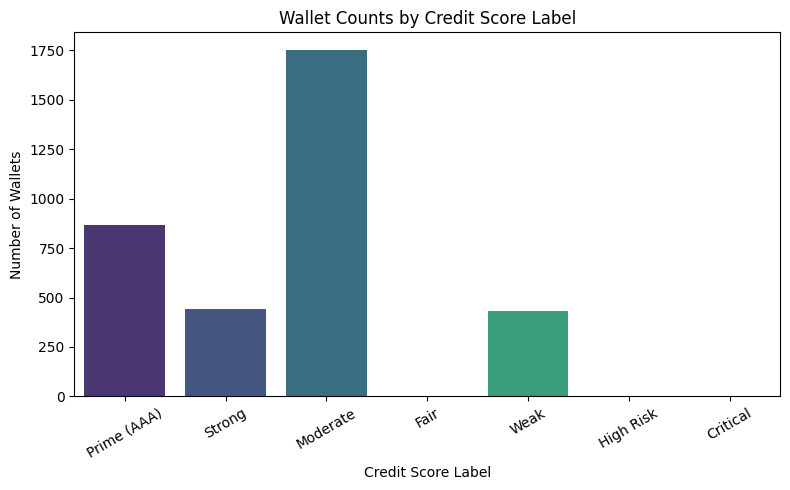

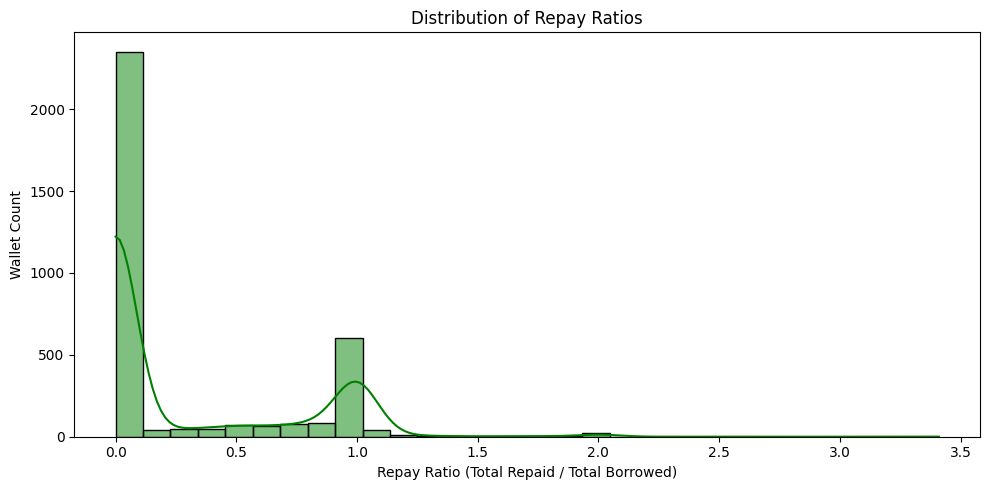

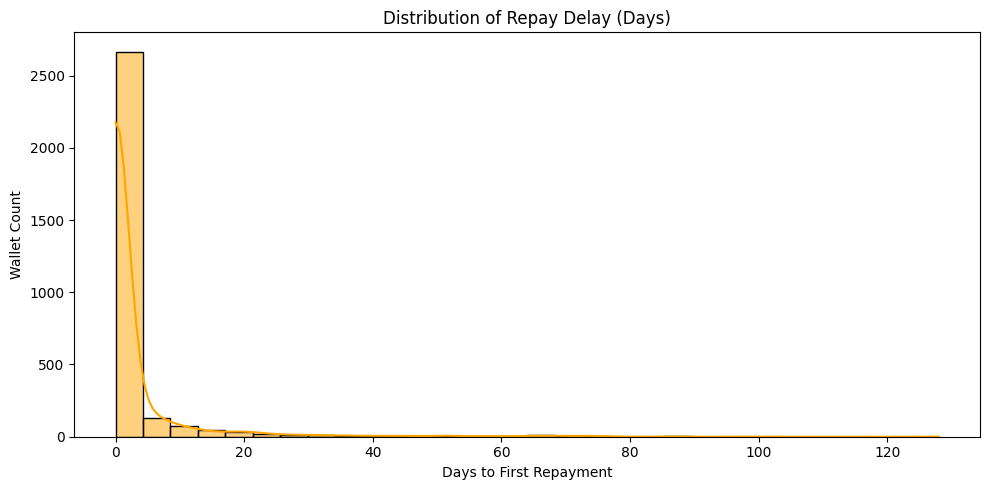

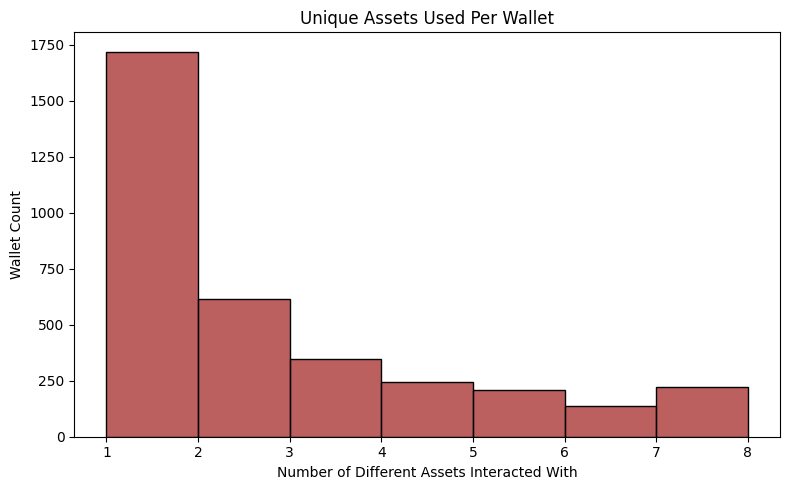

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Credit Score Histogram
plt.figure(figsize=(10,5))
sns.histplot(df_wallets['credit_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Wallet Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Wallet Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 2. Credit Score Category (Label) Bar Plot
plt.figure(figsize=(8,5))
order = ['Prime (AAA)', 'Strong', 'Moderate', 'Fair', 'Weak', 'High Risk', 'Critical']
sns.countplot(data=df_wallets, x='score_class', order=order, palette="viridis")
plt.title('Wallet Counts by Credit Score Label')
plt.xlabel('Credit Score Label')
plt.ylabel('Number of Wallets')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3. Repay Ratio Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_wallets['repay_ratio'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Repay Ratios')
plt.xlabel('Repay Ratio (Total Repaid / Total Borrowed)')
plt.ylabel('Wallet Count')
plt.tight_layout()
plt.show()

# 4. Repay Delay Days
plt.figure(figsize=(10,5))
filtered = df_wallets[df_wallets['repay_delay_days'] >= 0]  # exclude never repaid
sns.histplot(filtered['repay_delay_days'], bins=30, kde=True, color='orange')
plt.title('Distribution of Repay Delay (Days)')
plt.xlabel('Days to First Repayment')
plt.ylabel('Wallet Count')
plt.tight_layout()
plt.show()

# 5. Unique Asset Diversity
plt.figure(figsize=(8,5))
sns.histplot(df_wallets['unique_assets'], bins=range(1, df_wallets['unique_assets'].max() + 1), color='brown')
plt.title('Unique Assets Used Per Wallet')
plt.xlabel('Number of Different Assets Interacted With')
plt.ylabel('Wallet Count')
plt.tight_layout()
plt.show()



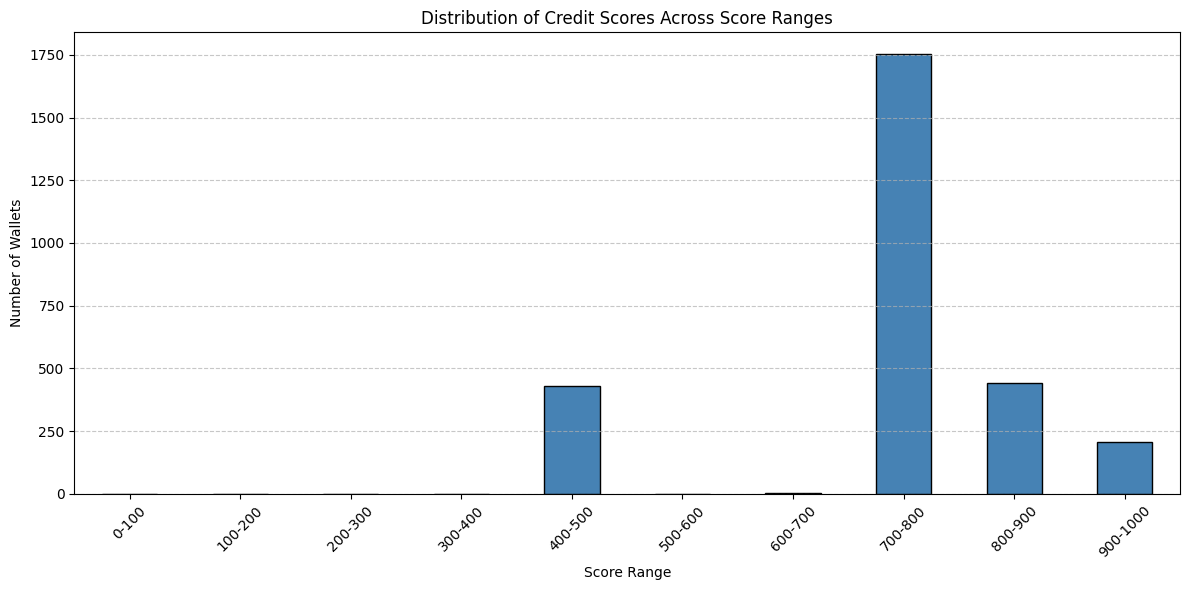

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000']
df_wallets['score_bin'] = pd.cut(df_wallets['credit_score'], bins=bins, labels=labels, right=False)
score_bin_counts = df_wallets['score_bin'].value_counts(sort=False)

plt.figure(figsize=(12, 6))
score_bin_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Distribution of Credit Scores Across Score Ranges")
plt.xlabel("Score Range")
plt.ylabel("Number of Wallets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('score_distribution.png')
